# Chocolate Scraping with Beautiful Soup

We have a website that has over 1700 reviews of chocolate bars from all around the world, which is found at https://content.codecademy.com/courses/beautifulsoup/cacao/index.html.

The data is displayed in a table, instead of in a `csv` or `json`. We can transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?

## Make Some Chocolate Soup

Make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is `https://content.codecademy.com/courses/beautifulsoup/cacao/index.html`

In [1]:
import requests

webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

Create a BeautifulSoup object called `soup` to traverse this HTML,  using `"html.parser"` as the parser, and the content of the response from the request as the document.

In [2]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(webpage.content, "html.parser")
# soup

In [3]:
# print(soup)

## How are ratings distributed?

Let's make a histogram of the ratings.

The first thing to do is to put all of the ratings into a list.
   
 Get all of the tags that contain the ratings and store them...

In [4]:
rating_tags = soup.find_all(attrs={'class':'Rating'})

ratings = []
for tag in rating_tags[1:]:
    ratings.append(float(tag.get_text()))

Using Matplotlib, create a histogram of the ratings values:

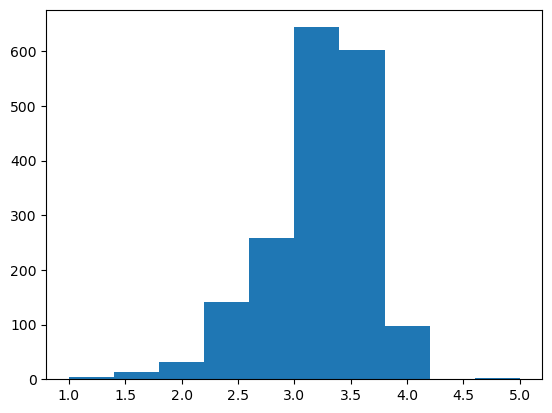

In [5]:
import matplotlib.pyplot as plt

plt.hist(ratings)
plt.show()

## Which chocolatier makes the best chocolate?

We want to now find the 10 most highly rated chocolatiers. We can make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

First, let's find all tags on the webpage that contain the company names:

In [6]:
company_tags = soup.find_all(attrs={'class':'Company'})
# company_tags
companies = []

Loop through the tags containing the company names, and add the text from each tag to the list you just created.

In [7]:
for tag in company_tags[1:]:
    companies.append(tag.get_text())

12. Create a DataFrame with a column "Company" corresponding to your companies list, and a column "Ratings" corresponding to your ratings list.

In [8]:
import pandas as pd

cacao_data = pd.DataFrame.from_dict({"Company":companies, "Rating":ratings})
# company_ratings

Use `.groupby` to group the DataFrame by Company and take the average of the grouped ratings.

Then, use the `.nlargest` command to get the 10 highest rated chocolate companies and print them out.
    

In [9]:
avg_ratings = cacao_data.groupby('Company').mean()
top_ratings = avg_ratings.nlargest(10, columns=['Rating'])
print(top_ratings)

                                        Rating
Company                                       
Tobago Estate (Pralus)                4.000000
Heirloom Cacao Preservation (Zokoko)  3.875000
Ocelot                                3.875000
Amedei                                3.846154
Matale                                3.812500
Patric                                3.791667
Idilio (Felchlin)                     3.775000
Acalli                                3.750000
Chocola'te                            3.750000
Christopher Morel (Felchlin)          3.750000


## Is more cacao better?

Let's see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

Using the same methods as above, we create a list that contains all of the cocoa percentages and store each percent as a float, after stripping off the `%` character.

In [10]:
cocoa_tags = soup.find_all(attrs={'class':'CocoaPercent'})
# cocoa_tags

Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

In [11]:
cocoaPercentages = []
for tag in cocoa_tags[1:]:
    percentage = float(tag.get_text()[:-1])
    cocoaPercentages.append(percentage)
    
cacao_data["CocoaPercentage"] = cocoaPercentages
# cacao_data.dtypes

Make a scatterplot of ratings (`your_df.Rating`) vs percentage of cocoa (`your_df.CocoaPercentage`).

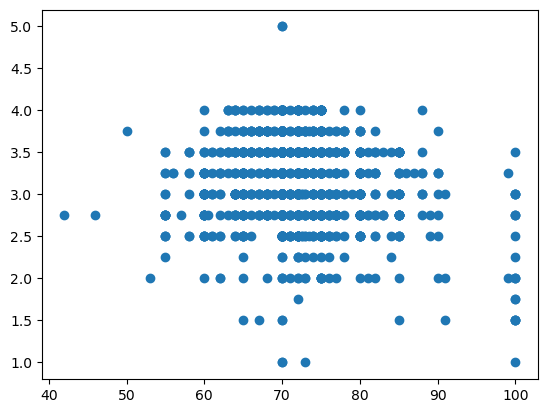

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(cacao_data.CocoaPercentage, cacao_data.Rating)
plt.show()
plt.clf()

We can use some numpy commands to draw a line of best-fit over the scatterplot.

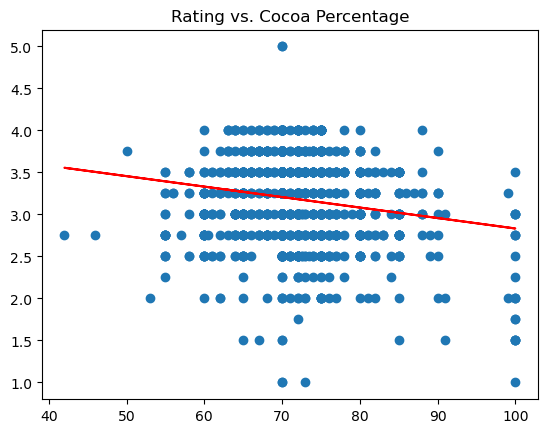

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np

plt.scatter(cacao_data.CocoaPercentage, cacao_data.Rating)
z = np.polyfit(cacao_data.CocoaPercentage, cacao_data.Rating, 1)
line_function = np.poly1d(z)
plt.plot(cacao_data.CocoaPercentage, line_function(cacao_data.CocoaPercentage), "r-")
plt.title('Rating vs. Cocoa Percentage')
plt.show()
plt.clf()

## Other questions to explore

Where are the best cocoa beans grown?

In [14]:
origin_tags = soup.find_all(attrs={'class':'BroadBeanOrigin'})
origins = []
for tag in origin_tags[1:]:
    origins.append(tag.get_text())

bean_df = pd.DataFrame.from_dict({"Origin":origins, "CocoaPercentage":cocoaPercentages})
bean_df.head()

cocoa_percentages = bean_df.groupby(['Origin']).mean()
top_cocoa = cocoa_percentages.nlargest(10, columns=['CocoaPercentage'])
print(top_cocoa)


                              CocoaPercentage
Origin                                       
Peru, Ecuador                       99.000000
Guat., D.R., Peru, Mad., PNG        88.000000
Samoa                               85.000000
Venezuela/ Ghana                    85.000000
Sao Tome & Principe                 79.357143
Central and S. America              78.000000
Principe                            77.000000
Carribean                           76.250000
El Salvador                         75.000000
Gabon                               75.000000


Which countries produce the highest-rated bars?

In [15]:
location_tags = soup.find_all(attrs={'class':'CompanyLocation'})
locations = []
for tag in location_tags[1:]:
    locations.append(tag.get_text())

location_df = pd.DataFrame.from_dict({"Location":locations, "Rating":ratings})
location_df.head()

avg_location_ratings = location_df.groupby(['Location']).mean()
print(avg_location_ratings.nlargest(10, columns=['Rating']))

               Rating
Location             
Chile        3.750000
Amsterdam    3.500000
Netherlands  3.500000
Philippines  3.500000
Iceland      3.416667
Vietnam      3.409091
Brazil       3.397059
Poland       3.375000
Australia    3.357143
Guatemala    3.350000
